In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Dataset/Test_dataset_ev_csv.csv")

In [ ]:
data.head()

,Day,Month,Hour,Minute,Class,Location
0,1,1,0,0,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
1,1,1,0,10,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
2,1,1,0,20,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
3,1,1,0,30,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."
4,1,1,0,40,HIGH,"Power House Rd, Block AD, Dakshini Pitampura, ..."


In [ ]:
data.shape

(17280, 6)

In [ ]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

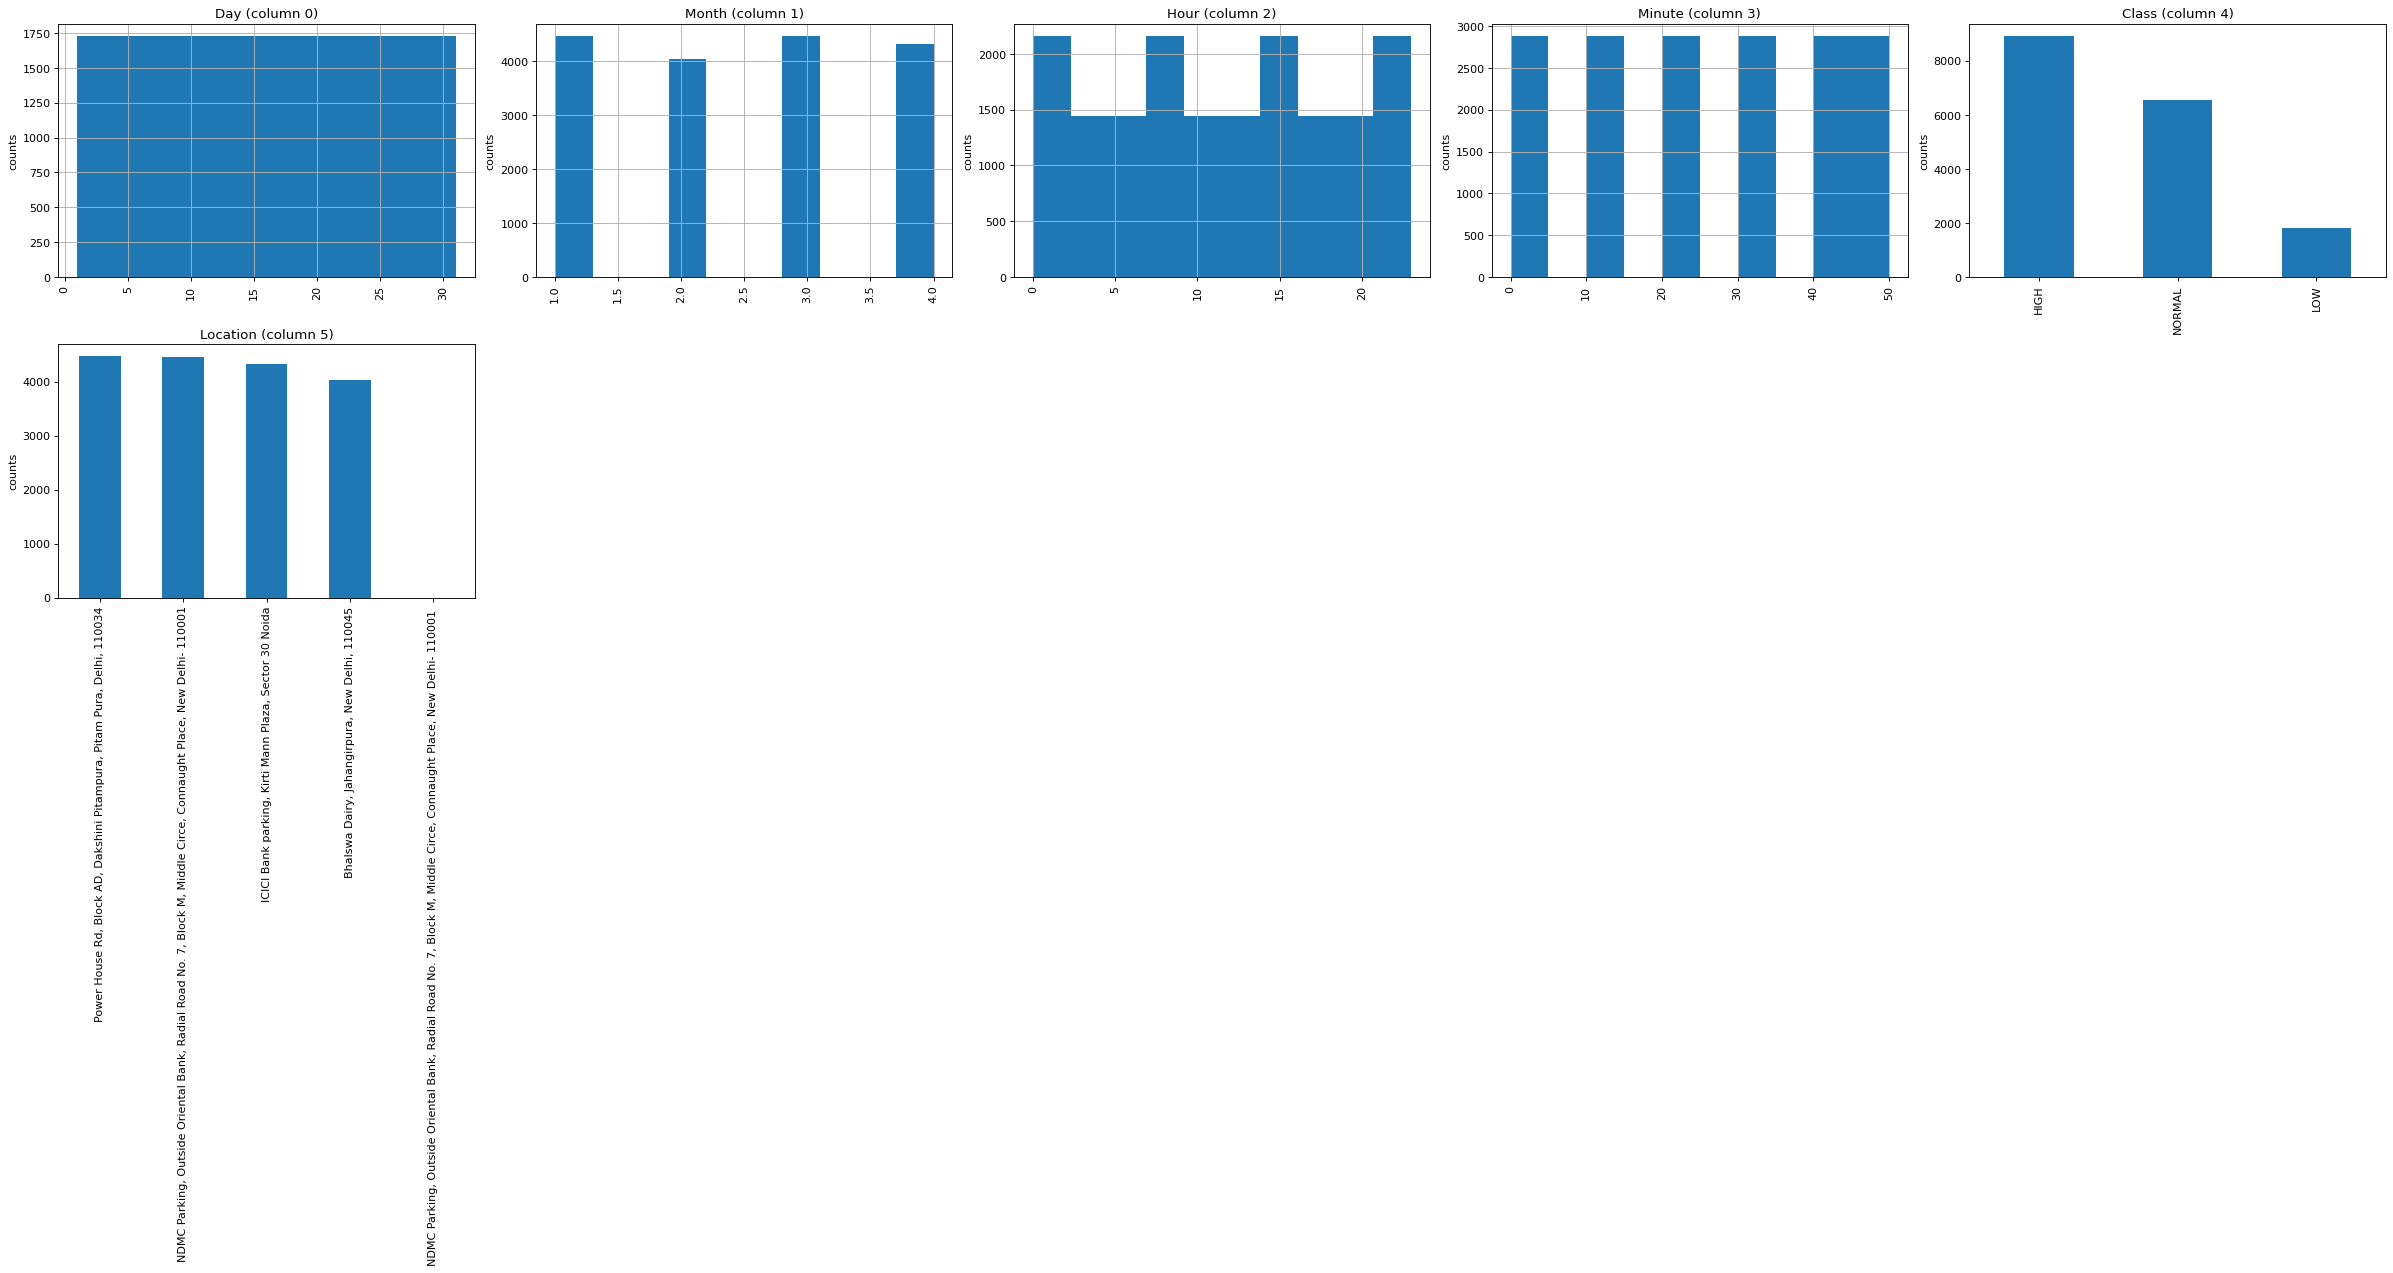

In [ ]:
plotPerColumnDistribution(data, 10, 5)

In [ ]:
data.columns

Index(['Day', 'Month', 'Hour', 'Minute', 'Class', 'Location'], dtype='object')

In [ ]:
xcols=['Day','Month','Hour','Minute','Location']
y=data['Class']

In [ ]:
x=data[xcols]

In [ ]:
x.head()

,Day,Month,Hour,Minute,Location
0,1,1,0,0,"Power House Rd, Block AD, Dakshini Pitampura, ..."
1,1,1,0,10,"Power House Rd, Block AD, Dakshini Pitampura, ..."
2,1,1,0,20,"Power House Rd, Block AD, Dakshini Pitampura, ..."
3,1,1,0,30,"Power House Rd, Block AD, Dakshini Pitampura, ..."
4,1,1,0,40,"Power House Rd, Block AD, Dakshini Pitampura, ..."


In [ ]:
y.head()

0    HIGH
1    HIGH
2    HIGH
3    HIGH
4    HIGH
Name: Class, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(x['Location'])
x['Location'] = label_encoder.transform(x['Location'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=6)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(x_train, y_train)
y_pred=clf.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
clf.score(x_test, y_test)

0.7000385802469136

In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(128)).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [ ]:
y_predicted=clf.predict(x_test)

In [ ]:
clf.score(x_test, y_test)

0.8414351851851852

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [ ]:
import tensorflow as tf

In [ ]:
x_train.shape

(36792, 4)

In [ ]:
from sklearn.preprocessing import MinMaxScaler 

In [ ]:
nums=MinMaxScaler()

In [ ]:
cols=x.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(x['Location'])
x['Location'] = label_encoder.transform(x['Location'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
x[cols] = nums.fit_transform(x[cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [ ]:
x=data[['Day','Month','Hour','Minute','Location']]
y=data['Class']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state=6)

In [ ]:
%%time
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])
model.fit(x_train,y_train, epochs=30)


Epoch 1/30
378/378 [==============================] - 1s 2ms/step - loss: 0.7535 - accuracy: 0.6494
Epoch 2/30
378/378 [==============================] - 1s 2ms/step - loss: 0.6373 - accuracy: 0.7175
Epoch 3/30
378/378 [==============================] - 1s 2ms/step - loss: 0.6008 - accuracy: 0.7266
Epoch 4/30
378/378 [==============================] - 1s 2ms/step - loss: 0.5714 - accuracy: 0.7367
Epoch 5/30
378/378 [==============================] - 1s 2ms/step - loss: 0.5487 - accuracy: 0.7410
Epoch 6/30
378/378 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7546
Epoch 7/30
378/378 [==============================] - 1s 2ms/step - loss: 0.5184 - accuracy: 0.7620
Epoch 8/30
378/378 [==============================] - 1s 2ms/step - loss: 0.5081 - accuracy: 0.7694
Epoch 9/30
378/378 [==============================] - 1s 2ms/step - loss: 0.4998 - accuracy: 0.7717
Epoch 10/30
378/378 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7765